# Handout #5: Classificiation with Random Forests



---



---



Content Authors:


*   Chris Malone Ph D, Professor of Data Science and Statistics, Winona State University; Email: cmalone@winona.edu
*   Collin Engstrom PhD, Assistant Professor of Computer Science, Winona State University; Email: collin.engstrom@winona.edu

Content in this handout was adapted from the following sources.
*   https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

* https://github.com/uci-ml-repo/ucimlrepo



---



---



## Libraries and Custom Functions

The following Python libraries will be used throughout this handout.

In [ ]:
# Need to import TensorFlow library
import tensorflow as tf

# Also need Numpy and MatPlot libraries
import numpy as np
import matplotlib.pyplot as plt

# Sci-Kit Learn Libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.utils import resample

from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


# Seaborn - Plotting
import seaborn as sns

# Pandas - Data Management
import pandas as pd

print(tf.__version__)

2.17.1


The following are custom functions that will be used in this handout.

In [ ]:
# Need a function that plots a confusion matrix for us
def plot_cm(labels, predictions):
#  cm = confusion_matrix(labels, predictions > threshold )
  cm = confusion_matrix(labels, predictions)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.1,1.1])
  plt.ylim([0,1.1])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

The **ucimlrepo** package can be used to easily import datasets from the UC Irvine Machine Learning Repository.  Source: [Github](https://github.com/uci-ml-repo/ucimlrepo)

In [ ]:
pip install ucimlrepo



---



---



## Example: Heart Disease

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally.
 Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains features that can be used to predict presence of heart disease.

The original database contains 76 attributes, but all published experiments refer to using a subset of 14.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4.

<table>
  <tr>
    <td width='100%'>
      <ul>
        <li><strong>Target</strong>: num - indicates presence of heart disease</li><br>
        <ul>
          <li>0 - No presence of heart disease</li>
          <li>1 - Mild or some presence of heart disease</li>
          <li>2 - Moderate presence of heart disease</li>
          <li>3 - Severe presence of heart disease</li>
          <li>4 - Very severe presence of heart disease</li>
        </ul>
        <li><strong>Features</strong>:</li>
        <ul>
          <li>age - age of patient (years)</li>
          <li>sex - sex of patient (0 = Female, 1 = Male)</li>
          <li>cp - chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)</li>
          <li>trestbps - resting blood pressure on admission to the hospital ((mm Hg)</li>
          <li>chol - serum cholestoral (mg/dl)</li>
          <li>fbs - fasting block sugar > 120 mg/dl (0 = false, 1 = true) </li>
          <li>restecg - resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</li>
          <li>thalach - maximum heart rate achieved</li>
          <li>exang: exercise induced angina (0 = No, 1 = Yes)</li>
          <li>oldpeak - ST depression induced by exercise relative to rest</li>
          <li>slope - the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)</li>
          <li>ca - number of major vessels (0-3) colored by flourosopy</li>
          <li>thal: thalassemia level (3 = normal; 6 = fixed defect; 7 = reversible defect)</li>
        </ul>
    </ul>
    </td>
</tr>
</table>

[Data - Local Copy](https://github.com/christophermalone/mayo_ml_workshop/blob/main/datasets/Heart_Disease.csv)

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

The following code will read in the Heart Disease dataset directly from the UC Irvine Machine Learning Repository.  This dataset has id=45 on the UCI site.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch the heart disease dataset from UCI Repo
heart_disease = fetch_ucirepo(id=45)

The following will create a pandas data.frame (i.e. **X**) that contains the 13 features and the second data.frame that contains the target (i.e. y).

In [ ]:
# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

print("The Features matrix:")
print(X)

print("The Target:")
print(y)

The Features matrix:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   

The **ucimlrepo** package allows us to easily get meta information and a description of the variables for this dataset.

In [ ]:
# Getting the metadata
print(heart_disease.metadata)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
# Getting variable information
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              



---



---



## Understanding a Decision Tree

A decision tree is a non-parametric supervised learning algorithm that can be used for both classification and regression tasks. A decision tree has a root node, branches, and a set of terminal nodes.

The most common types of decision trees are classification and regression trees (CART), which were introduced by Leo Breiman (1984). This algorithm typically utilizes Gini impurity to identify the ideal attribute to split on. When evaluating using Gini impurity, a lower value is more ideal.

The following is an example of a decision tree that would be used to classify a target varible that has four levels.  

* This decision tree has an initial layer (sometimes referred to as the root node)

* The branches divide the data into partions or subsets.

* All branches are created using a binary split.

* The Gini impurity measure is used to optimize the partioning of the data.

* Additonal layers or branches are added to the tree to allow the algorithm to enhance is predictive ability.

* In each final node, the predicted level for the target variable is the level that is in the majority.

* This tree appears to be performing fairly well as the terminal nodes have a clear majority for each level of the target variable.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=156V8QNz3935iKwQggiXQbEsGZHqEmmoQ" width='60%' height='60%'></img></p>


Consider the second decision tree provided below.  This tree has created splits using different features than the tree above.  This tree does not appear to classify as well as the terminal nodes since the terminal nodes do not have clear majorities for the levels of the target variable.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Ywl5lo9_5rIGREDp3KLKU3kd-auMeFzq" width='60%' height='60%'></img></p>


### Concept of Gini Impurity

**Gini Impurity** is a concept that measures the purity of a terminal node.  This quantity is by the Random Forest algorithm to decide which feature will be used in any given split.  The Gini value in a given node is computed as follows.

$$Gini = 1 - \sum_{i=1}^{k} p_{i}^2$$

Next, suppose feature A is to split or partition the data into two pieces, say  $P_1$ and $P_2$ with sample sizes $n_1$ and $n_2$, respectively.  The Gini Impurity value across these two partitions is simply the weighted average of the two $Gini$ values.

$$ Gini_{A} = (\frac{n_1}{n})Gini_{P_1} + (\frac{n_2}{n})Gini_{P_2}
$$

Comments:

* A split that reduces the $Gini$ value is a good, i.e. smaller $Gini$ values are *better*.

* The maximum $Gini$ value is $(1-\frac{1}{k})$ where $k$ is the number of levels for the target variable.

### Example Decision Trees

Consider the Heart Disease dataset where the $6$ rows that included missingness for the $ca$ or $thal$ have been removed. A total of $297$ patients remain.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1tTfPQSEHXcVrnxlSuxv2_hdUPXEQPvYp" width='75%' height='75%'></img></p>


$$\begin{array}{rcl}
Gini \space Value_{Initial} & = & 1 - \sum_{i=1}^{k} p_{i}^2\\
& = & 1 - (0.044^2+0.118^2+0.118^2 + 0.182^2 + 0.539^2) \\
& = & 0.647 \\ \end{array}$$

Suppose a decision tree splits on $chol < 281$.  The data is split into two pieces with the left side having $71$ observations and the right side having $226$ observations.  Note that the majority level on each side is $Level = 0$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1sWBTpNsIuvY0mh2S7fMJTXjHtn0y1thf" width='75%' height='75%'></img></p>


The computation of the $Gini \space Value$ for the node in each partition.

$$\begin{array}{rcl}
Gini_{1} & = & 1 - \sum_{i=1}^{k} p_{i}^2\\
& = & 1 - (0.070^2+0.141^2+0.197^2 + 0.183^2 + 0.408^2) \\
& = & 0.736 \\ \end{array}$$

and

$$\begin{array}{rcl}
Gini_{2} & = & 1 - \sum_{i=1}^{k} p_{i}^2\\
& = & 1 - (0.035^2+0.111^2+0.093^2 + 0.181^2 + 0.580^2) \\
& = & 0.647 \\ \end{array}$$

The $Gini$ value after the $chol < 281$ split is computed as follows.



$$\begin{array}{rcl}
Gini_{chol< 281} & = & \frac{n_1}{n}Gini_1 + \frac{n_R}{n}Gini_2\\
& = & \frac{71}{297}0.736 + \frac{226}{297}0.647 \\
& = & 0.639 \\ \end{array}$$

**Comment**:  The $Gini$ value decreased from an initial value of $0.647$ to $0.639$ after the $chol < 281$ split. The $Gini$ value did not decrease very much implying this split was not a good split.

Next, suppose another split is considered.  Here, the split occurs for the rows in which $chol< 281$.  This split is using the $cp$ feature and is split on $cp < 4$. Again, the majority level for the target variable is Level = 0 for all nodes.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1eHa_DqcIR5w8NKRirLvKrvkxhmAexKcB" width='75%' height='75%'></img></p>


Next, yet another split is utilized by this decision tree for patients with $chol < 281 $ and $cp >=4$.  This tree decided to split on $ca < 1$.   The $Gini$ value for this decision tree is $0.552$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1XSmpMs5yeka-LitPmrf_Za3Iw2fye-3n" width='75%' height='75%'></img></p>


A summary of this decision tree is provided here.

* The initial $Gini$ value was $0.647$.
* The splits within this decision tree were $chol < 281$, $cp < 4$, and $ca > 1$.
* The final $Gini$ value for this tree was $0.552$, a reduction of about $0.10$.




---




Next, consider a second decision tree that initally splits on $thal < 6$

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1_E3not9ql_u4FX1XvSScUYULRi14UZU6" width='50%' height='50%'></img></p>



The second split in this decision tree is on $ca < 1$ for those with $thal < 6$

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1DMWBmWRN4qtN29E6ftixXVlzirmG9Si1" width='50%' height='50%'></img></p>


The third split uses $ca < 1$ again, but this splits happens in the $thal >=6$ branch of the tree.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1AYRiQ7O-pb0BENJiM0daI-abT9c7-R0j" width='75%' height='75%'></img></p>


A summary of this second decision tree is provided here.

* The $Gini$ value after the $thal < 6$ split was $0.559$.  This initial split almost did better than the entire first decision tree discussed above.  The $thal < 6$ split is much better than splitting on $chol < 281$.

* The final decision tree has a $Gini$ value of $0.516$.



---



---



## Understanding a Random Forest

**Random Forest** is a machine learning algorithm that uses an ensemble of decision trees to make a prediction. A random forest combines the outcomes from many different decision trees which have been trained on different subsets of data.  The combining of outcomes across several trees is considered an ensemble learning method where the "forest" represents a collection of individual decision trees.

The **random** part of the name "random forest" comes from the fact that rows (patients) and colums (features) are randomly selected to be used for the construction of the various trees. Each tree is built using slightly different characteristics which leads to improved model robustness and a reduction in overfitting.

A summary of a random forest algorithm is provided here.

* For a given decision tree, a random subset of the features are used to build a the tree (not all the features).  This reduces the reliance on any one feature which increases the robustness of the algorithm.

* For a given decision tree, a bootstrap resample of the data is taken and used in the construction of a tree.

* Several hundred individual decision trees are constructed by the random forest algorithm.  The predicted level of the target variable  from each tree is obtained.  

* The final step is to use a majority vote across all trees when making a final prediction for the level of the target variable.



<p align='center'><img src="https://drive.google.com/uc?export=view&id=17CRRdFT5dO3ENJ7TFNVwVVz10yHOrvYZ" width='75%' height='75%'></img></p>

[Image Source](https://https://www.nature.com/articles/s41598-022-15374-5)

**Comment**: The Random Forest algorithm uses a random selection of rows and a random selection of features.  Thus, imputing missingness is generally not done when fitting a Random Forest.



---



### Tuning Parameters for a Random Forest

The following tuning parameters may be considered for the Random Forest algorithm.

* n_estimators - the number of trees in the forest (default value is 100, which seems a bit small)

* max_depth - the maximum depth of the tree

* min_samples_split - the minimum number of samples required to create a split (used to prevent overfitting)

Source [Sci-kit Learn RandomForestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
)





---



---



## Target Variable

The RandomForest algorithm does not require a binary target.  Thus, the original target variable with 5 levels (0, and 1-4) will be used here.

In [ ]:
print(y)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


The following graph provides the distribution of the target variable.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1xPes5UnIWiughTqIbiklUbE443zDHVV2" width='50%' height='50%'></img></p>



---



---



## Balance in the Levels of Target Variable

The likelihood of **balance** across the levels of the target variable is small when predicting a target with multiple levels.  The optimal situation would have equal representation across the levels of the target variable.



---



---



## Pre-Processing of the Features

Recall the ucimlrepo package allowed us to easily define read-in the $ \bf{X}$ matrix directly from the UC Irvine ML repository that contains the available features for the logisitic regression model.

In [ ]:
#Get the number of rows and features
X.shape

(303, 13)

In [ ]:
#Taking a look at the first few rows of the X matrix
X.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


Reacll, a look at the summaries for all the features show a small amount of missingness for $ca$ and for $thal$.

In [ ]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


The following snipit of code will allow you to identify which rows are missing for which feature variables.

In [ ]:
X[X.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0


**Note**:  The Random Forest algorithm uses a random selection of rows and features when builing the classifier.  Thus, broadly speaking, imputation is usually not done when builing a predictive model using a Random Forest.

### Scaling the Features - MinMax

Let's take a look at the $\bf{X}$ matrix again to understand what features must be scaled.

In [ ]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


**Note**: The Random Forest algorithm allows for levels from categoricial features to be combined when builing the tree.  Thus, OneHot Encoding of the categorical variables is not necessary when building a Random Forest classifier.

The following scaling will be done to the feature matrix $\bf{X}$.

* [Numeric] $age$ - apply MinMax Scaler
* [Numeric] $trestbps$ - apply MinMax Scaler
* [Numeric] $chol$ - apply MinMax Scaler
* [Numeric] $thalach$ - apply MinMax Scaler
* [Numeric] $oldpeak$ - apply MinMax Scaler
* [Numeric] $ca$ - apply MinMax Scaler


The following specifications for the **scaling** of the features are specified below for the ColumnTransformer.

In [ ]:
#Note: Sex, fbs, and exang will do not need to be OneHotEncoded
transformers_list = [
                     ('scale', MinMaxScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'])
                    ]

column_transformer = ColumnTransformer(transformers_list, remainder = 'passthrough')

The following snipit of code will apply the above columns transformer specifed above the the $\bf{X}_{Imputed}$ feature matrix.  Careful consideration is required when naming each of the columns from this scaling transformation.  The column order is specifed by the order in which the features are listed in the ColumnTransformer above.

In [ ]:
#Apply the desired tranformation to the matrix of features
X_Scaled = pd.DataFrame(column_transformer.fit_transform(X),
                                columns=['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
                               )

The final feature matrix that will be used to fit the logistic regression model.

In [ ]:
X_Scaled.head(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex,cp,fbs,restecg,exang,slope,thal
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.000000,1.0,1.0,1.0,2.0,0.0,3.0,6.0
1,0.791667,0.622642,0.365297,0.282443,0.241935,1.000000,1.0,4.0,0.0,2.0,1.0,2.0,3.0
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.666667,1.0,4.0,0.0,2.0,1.0,2.0,7.0
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.000000,1.0,3.0,0.0,0.0,0.0,3.0,3.0
4,0.250000,0.339623,0.178082,0.770992,0.225806,0.000000,0.0,2.0,0.0,2.0,0.0,1.0,3.0
5,0.562500,0.245283,0.251142,0.816794,0.129032,0.000000,1.0,2.0,0.0,0.0,0.0,1.0,3.0
6,0.687500,0.433962,0.324201,0.679389,0.580645,0.666667,0.0,4.0,0.0,2.0,0.0,3.0,3.0
7,0.583333,0.245283,0.520548,0.702290,0.096774,0.000000,0.0,4.0,0.0,0.0,1.0,1.0,3.0
8,0.708333,0.339623,0.292237,0.580153,0.225806,0.333333,1.0,4.0,0.0,2.0,0.0,2.0,7.0
9,0.500000,0.433962,0.175799,0.641221,0.500000,0.000000,1.0,4.0,1.0,2.0,1.0,3.0,7.0


The  target variable that will be used in the fitting of the Random Forest Classifier.

In [ ]:
y[0:10]

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1




---



---



## Split-Sample Validation

A split-sample validation approach will be implemented here when fitting our logistic regression model.  The split-sample will use $70\%$ of the samples for the training set and $30\%$ of the samples for the test set, i.e. a $70:30$ specification.

In [ ]:
# Break into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y,
                                   test_size=0.3,
                                   random_state=0,
                                   shuffle=True)

After the OneHot Encoding has been applied to the categorical features, there are a total of $18$ columns in the feature matrix.

In [ ]:
# determine the number of input features
n_features = X_train.shape[1]
print(n_features)

13




---



---



## Fitting the Random Forest Classifier

Source [Sci-kit Learn RandomForestClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html
)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500,
                                  max_depth=5,
                                  min_samples_split=10,
                                  random_state=0
                                 )

Next, fitting the random forest model to our training set.

In [ ]:
#Fitting the random forest classifier
#Note:  the ravel() method converts flattens the array -- simply preventing a warning from being thrown

rf_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=500,
                       random_state=0)

The .predict\_proba() function will return the predicted probabilities for each level of the target variable.  Here, predicted probabilities are obtained for observations in the test set.

In [ ]:
# Get predictions for the each level of the target variable
y_pred = rf_model.predict_proba(X_test)

print(pd.DataFrame(y_pred))

           0         1         2         3         4
0   0.974559  0.019271  0.001546  0.002148  0.002476
1   0.468799  0.232335  0.131585  0.115300  0.051981
2   0.374514  0.276911  0.148888  0.175395  0.024291
3   0.348476  0.341997  0.163178  0.096360  0.049989
4   0.789197  0.104404  0.043556  0.043759  0.019083
..       ...       ...       ...       ...       ...
86  0.961534  0.031986  0.002180  0.003553  0.000747
87  0.122187  0.202760  0.293773  0.267358  0.113923
88  0.068142  0.258086  0.369460  0.232375  0.071937
89  0.055896  0.223462  0.221257  0.440381  0.059003
90  0.937167  0.044709  0.006199  0.009795  0.002130

[91 rows x 5 columns]


The following snipit of code will obtain the final prediction for the level of the target variable for each observation in the test set.

In [ ]:
#Getting the prediction for the level of the target variable
y_pred = rf_model.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 2, 1, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 3, 0, 0,
       2, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 2,
       2, 3, 0])



---



---



## Confusion Matrix & Precision

The following code can be used to create a confusion matrix. This code uses the custom plot_cm() function provided above.  

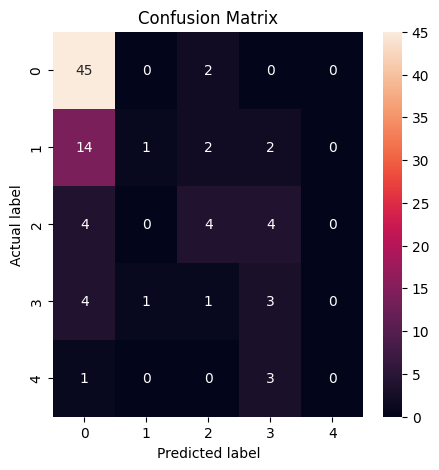

In [ ]:
#Confusion Matrix
plot_cm(y_test, y_pred)

**Precision** is the proportion of correct predictions among all predictions of a certain class. In other words, it is the proportion of true positives among all positive predictions.  The precision score is a global measure of accuracy for multiclass/multilabel targets. The average = 'micro' specification is required here.



In [ ]:
# evaluate the model
# average the precision over possible categories
prec = precision_score(y_test, y_pred, average='micro')

print('Precision Score: {:.3f}'.format(prec))

Precision Score: 0.571




---



---



## Variable Importance

Akin to other machine learning algorithms, the Random Forest Classifier has the ability to quantify feature importance.  This is done using .feature_imporances_ and is shown here.

In [ ]:
# Built-in feature importance (Gini Importance)
importances = rf_model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_Scaled.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)

print(feature_imp_df)

     Feature  Gini Importance
12      thal         0.146659
4    oldpeak         0.130374
3    thalach         0.129004
10     exang         0.101158
7         cp         0.089145
0        age         0.088767
5         ca         0.086837
2       chol         0.074804
1   trestbps         0.058265
11     slope         0.055048
6        sex         0.017577
9    restecg         0.011822
8        fbs         0.010541


The following snipit of code creates a bar plot showing the importance of each feature variable.

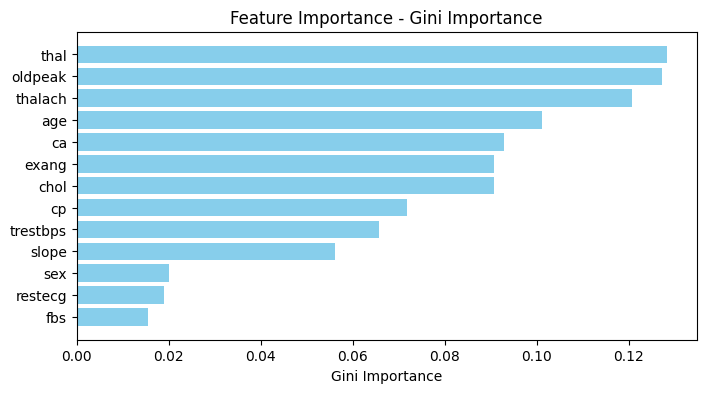

In [ ]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Gini Importance'], color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()



---



---

End of Document